<a href="https://colab.research.google.com/github/Gear-608/Practica3_Ingenieria-Medica_1972000/blob/main/PT1/Pract3_Ing_medica_Equipo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero se procedera a cargar las imagenes que se utilizaran para el desarrollo de la practica siendo estas: "salamanders.jpg", "spacewolves.jpg" y "thousandsons.jpg".

In [6]:
from google.colab import files
uploaded = files.upload()

Saving salamanders.jpg to salamanders.jpg


In [8]:
from google.colab import files
uploaded = files.upload()

Saving spacewolves.jpg to spacewolves.jpg


In [9]:
from google.colab import files
uploaded = files.upload()

Saving thousandsons.jpg to thousandsons.jpg


Ahora se empezara con el desarrollo de la practica realizando el Ejercicio 1: Representacion de la imagen en el espacio RGB:
0.-Primero se importaron las librerias necesacias estas siendo OpenCV o "cv2" con esta se puede cargar imagenes y cambiar el formato de color. Despues esta Numpy o "np"la cual es una libreria fundamental para el trabajo con arreglos y matrices numericas. Matplotlib "plt" la cual sirve para la visualizacion de datos.

# 1.-Ejercicio 1:
Ahora para empezar con el Ejercicio 1.

Con imagen = cv2.imread('/content/salamanders.jpg') Se cargo la imagen desde la ruta de Google Colab.

Con imagen_rgb = cv2.cvtColor (imagen, cv2.COLOR_BGR3RGB) ; Se convierte la imagen de BGR a RGB.


Para mostrar la imagen convertida a RGB se usaron las siguientes lineas de codigo:

Con plt.imshow(imagen_rgb) ; Se muestra la imagen

Con plt.axis('off') ; se quitan los ejes.

Con plt.show() ; Se muestra la imagen en pantalla.

Para extraer los valores de RGB se utilizo lo siguiente:
pixeles = imagen_rgb.reshape(-1,3)

En este caso para practicidad solo se mostraran los valores RGB de los primeros 10 pixeles:

print("Valores RGB de los primeros 10 pixeles:")

print(pixeles[:10])
_______________________________________

Finalmente para representar los valores RGB de la imagen se creo una grafica con las siguientes lineas de codigo:

from mpl_toolkits.mplot3d import Axes3D ; Se importa "Axes3D"  para poder crear graficos tridimensionales.

fig = plt.figure(figsize=(8,8)) ; crea la base para el grafico con un tamañp de 8x8 in.

ax = fig.add_subplot(111, projection="3d") ; crea un subgrafico 3D de una fila, una columna de primer grado.


r = pixeles[:,0]  ;la columna 0 son valores de canal rojo.
g = pixeles[:,1]  ;la columna 1 son valores de canal verde.
b = pixeles[:,2]  ; la columna 2 son valores de canal azul.

Se crea la grafica utilizando cada pixel como un punto pequeño entre los canales rojo, verde y azul:

ax.scatter(r, g, b, c=pixeles/255.0, marker=".") ;

ax.set_xlabel("Rojo (R)")  ;

ax.set_ylabel("Verde (G)")  ;

ax.set_zlabel("Azul (B)")   ;

plt.title("Espacio de color RGB")   ;

plt.show() ;



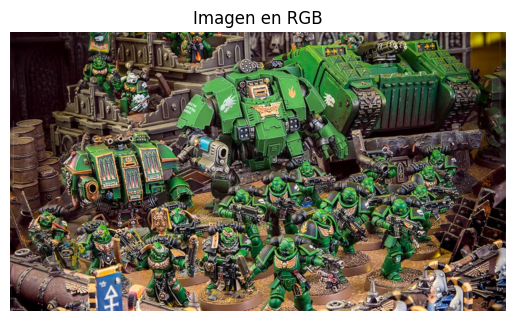

Valores RGB de los primeros 10 píxeles:
[[43 22 29]
 [38 17 24]
 [32 11 18]
 [27  6 13]
 [26  5 12]
 [26  5 12]
 [27  6 13]
 [27  6 13]
 [25  4 11]
 [24  3 10]]


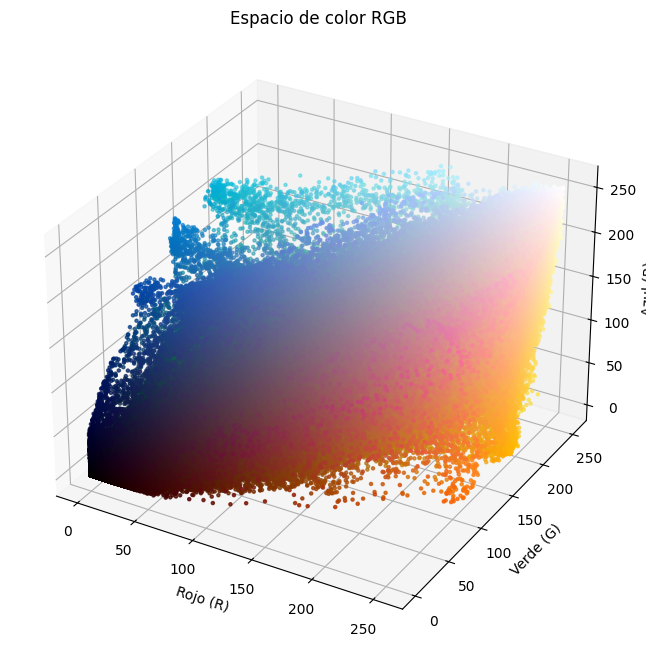

In [7]:
#Ejercicio 1: Representacion de la imagen en el espacio RGB
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar una imagen a color
imagen = cv2.imread('/content/salamanders.jpg')

# OpenCV carga en BGR, lo convertimos a RGB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# 2. Visualizar la imagen
plt.imshow(imagen_rgb)
plt.title("Imagen en RGB")
plt.axis("off")
plt.show()

# 3. Extraer los valores RGB de todos los píxeles
pixeles = imagen_rgb.reshape(-1, 3)

print("Valores RGB de los primeros 10 píxeles:")
print(pixeles[:10])

# 4. Mostrar Grafico
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

r = pixeles[:,0]
g = pixeles[:,1]
b = pixeles[:,2]

ax.scatter(r, g, b, c=pixeles/255.0, marker=".")
ax.set_xlabel("Rojo (R)")
ax.set_ylabel("Verde (G)")
ax.set_zlabel("Azul (B)")
plt.title("Espacio de color RGB")
plt.show()


La realizacion de esta primera actividad permitio declarar las primeras librerias, y poder realizar la conversion de la imagen BGR a RGB, esto para posteriormente obtener todos los valores RGB de la imagen siendo que la imagen es de una resolucionde 1920x1080 se necesitarian alrededor de 2,073,600 valores para tener todos, razon por la que solo se utilizaron los primeros 10 valores RGB de la imagen. Con el resultado de la grafica se pudo observar la presencia de los valores en las escalas de RGB siendo cada punto un valor de RGB de la imagen.

# 2.-Ejercicio 2
En el Ejercicio 2: Segmentacion con K-means. Primero se declaro una nueva libreria esta es "Scikit-learn" o "sklearn.cluster.KMeans" esta libreria se especializa en machine learning y analisis de datos, siendo la que nos permitira realizar la segmentacion de la imagen.

Ahora que ya tenemos importada la libreria se empezara el proceso de la actividad. Primero se cargo la nueva imagen "thousandsons.jpg" despues de esto se convirtio esta imagen de BGR a RGB, siguiente a esto se mostro la imagen original.

Despues de tener la imagen debemos prepararla para utilizar K-means, primero se extrayeron los valores RGB de la imagen para con esto utilizar:
_________________________________________________________________________
Con #def segmentar_kmean(pixels, k, shape): para empezar la segmentacion de la imagen.

-Con means = KMeans(n_clusters=k, random_state=42); se crea el modelo k-means.

-Con kmeans.fit(pixels); se entrena K-means con los pixeles.  

-Con labels = kmeans.labels_ ; se obtienen las etiquetas de cada pixel.

-Con colores = kmeans.cluster_center:.astype(int) ; se obtienen los colores promedio de cada cluster.

-Con imag_segmentada = colores[labels].reshape(shape) return imag_segmentada, colores ; se reconstruye la imagen segmentada con los colores primedio.
_____________________________________________________________________________

Ahora para realizar las pruebas de k =2, 4 y 6 primero se definieron estas regiones con: ks = [2, 4, 6]

Con for k in ks: imag_seg, colores = segmentar_kmeans(pixels, k, imag_rgb.shape) ; se crea un bucle para crear las imagenes segmentadas de 2,4,6 y crear la lista de colores por cada cluster.

Con plt.figure(figsize=(6,6)) ; se crea una figura de 6x6.

Con plt.imshow(imag_seg) ; muestra la imagen segmentada.

Con plt.axis('off') ; se ocultan los ejes para limpieza.

Con plt.title(f"Segmentacion con k={k}") ; Se coloca un titulo con el numero de clusters "k".

Para mostrar los resultados se utilizaron las siguientes lineas de codigo:

Para mostrar las imagenes segmentadas:

Con plt.figure(figsize=(6,6)) ; Se crea una figura de 6x6 in.

Con plt.imshow(imag_seg) ; Se crea la imagen segmentada.

Con plt.axis('off') ; se quitan los ejes.

Con plt.title(f"Segmentación con k=(k")) ; Se coloca un titulo con el valor de "k"

Con plt.show() ; Se muestra la imagen en pantalla.
_______________________________________
Ahora para mostrar los colores promedio de cada cluster se uso el siguiente codigo:

Con print(f"Colores promedio de cada cluster para k={k}:") ; Se utiliza para mostrar el mensaje de los colores de cada caso de "k" cluster.

Con for i, color in enumerate(colores):  ; se crea un bucle de arreglo de los colores promedio de cada cluster.

Con print(f"  Cluster {i+1}: {color}") ; Se muestra el numero del cluster y su color promedio.

Con print("\n" + "-"*40 + "\n") ; Se crea un salto de linea y una linea horizontal para separar las secciones de la consola.

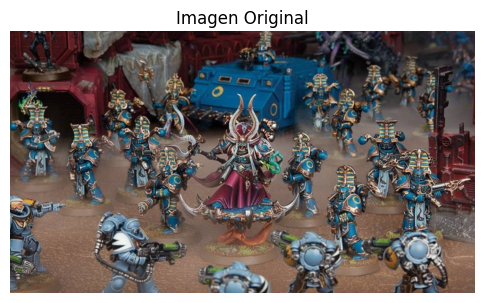

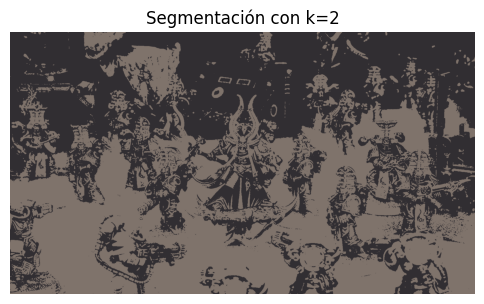

Colores promedio de cada cluster para k=2:
  Cluster 1: [127 115 107]
  Cluster 2: [49 46 50]

----------------------------------------



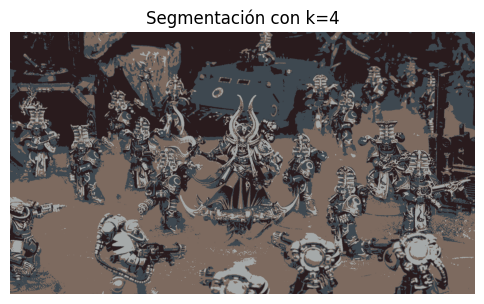

Colores promedio de cada cluster para k=4:
  Cluster 1: [165 169 169]
  Cluster 2: [41 27 29]
  Cluster 3: [125 106  95]
  Cluster 4: [62 72 80]

----------------------------------------



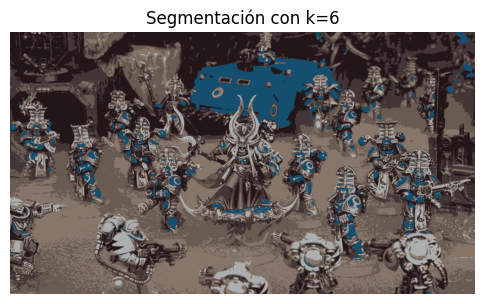

Colores promedio de cada cluster para k=6:
  Cluster 1: [171 175 176]
  Cluster 2: [34 22 25]
  Cluster 3: [135 118 106]
  Cluster 4: [105  90  82]
  Cluster 5: [68 54 54]
  Cluster 6: [ 21  79 111]

----------------------------------------



In [25]:
# Ejercicio 2: Segmentación con K-means
from sklearn.cluster import KMeans

#Cargar imagen
imag = cv2.imread('/content/thousandsons.jpg')
# Convertir a RGB
imag_rgb = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

# Mostrar imagen original
plt.figure(figsize=(6,6))
plt.imshow(imag_rgb)
plt.axis('off')
plt.title("Imagen Original")
plt.show()

# Preparar los datos para K-means
pixels = imag_rgb.reshape(-1, 3)  # Cada píxel es un punto (R,G,B)

# Función para segmentar con K-means
def segmentar_kmeans(pixels, k, shape):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    colores = kmeans.cluster_centers_.astype(int)

    # Reconstruir la imagen segmentada
    imag_segmentada = colores[labels].reshape(shape)

    return imag_segmentada, colores

# Probar con k=2, k=4, k=6
ks = [2, 4, 6]
for k in ks:
    imag_seg, colores = segmentar_kmeans(pixels, k, imag_rgb.shape)

    # Mostrar la imagen segmentada
    plt.figure(figsize=(6,6))
    plt.imshow(imag_seg)
    plt.axis('off')
    plt.title(f"Segmentación con k={k}")
    plt.show()

    # Mostrar colores promedio de cada cluster
    print(f"Colores promedio de cada cluster para k={k}:")
    for i, color in enumerate(colores):
        print(f"  Cluster {i+1}: {color}")
    print("\n" + "-"*40 + "\n")


Al realizar la actividad se puede mostrar como al aumentar el valor de k en el proceso de segmentar la imagen los colores son cada vez mas presentes y parecidos a la imagen original, lo cual es comprobable al observar no solo de forma visual las imagene sino tambien al observar los valores de colores promedio en cada uno de los clusters de los casos de 2 regiones, 4 regiones y 6 regiones.
________________________________________

# 3.-Ejercicio 3
El objetivo de este ejercicio es utilizar K-means para identificar y resaltar al menos 3 regiones distintas o "k=3".

Primero se cargo la imagen "spagewolves.jpg" para convertir esta de BGR a RGB y mostrar esta imagen.

Despues de prepararon los datos para K-means como se hizo en el ejercicio 2. Al momento de aplicar K-means a diferencia del ejercicio 2 donde utilizamos un loop "for" para simplificar la obtencion de k=2, k=4 y k=6, aqui solo se declarara que "k=3" este siendo el numero de regiones que queremos resaltar.

De este punto mencionado en adelante todo el codigo utilizado seria igual al utilizado en el ejercicio 2 para el funcionamiento y visualizacion de los resultados de K-means.


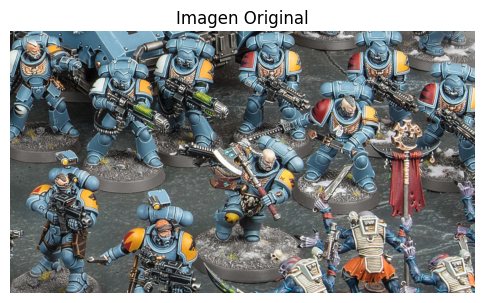

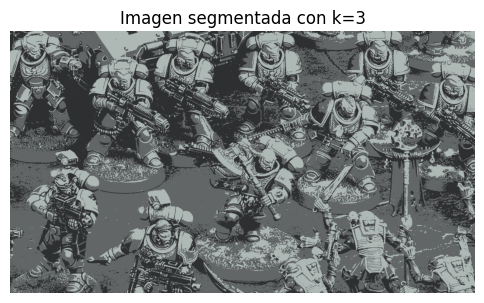

Colores promedio de cada cluster para k=3:
  Cluster 1: [174 185 182]
  Cluster 2: [ 98 102 103]
  Cluster 3: [46 47 48]


In [26]:
#Ejercicio 3
#Cargar imagen
img = cv2.imread('/content/spacewolves.jpg')
# Convertir a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar imagen original
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Imagen Original")
plt.show()

#Preparar los datos para K-means
pixels = img_rgb.reshape(-1, 3)
#Aplicar K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

labels = kmeans.labels_
colores = kmeans.cluster_centers_.astype(int)

# Reconstruir imagen segmentada
img_segmentada = colores[labels].reshape(img_rgb.shape)

# Mostrar la imagen segmentada
plt.figure(figsize=(6,6))
plt.imshow(img_segmentada)
plt.axis('off')
plt.title(f"Imagen segmentada con k={k}")
plt.show()

# Mostrar colores promedio de cada cluster
print(f"Colores promedio de cada cluster para k={k}:")
for i, color in enumerate(colores):
    print(f"  Cluster {i+1}: {color}")

Con lo realizado en este tercer ejercicio se puede ver un resultado muy parecido a lo realizado en el ejercicio 2, en especial en el Cluster 4 esto es facil de explicar al ser regiones muy cercanas. Lo que muestra que mientras mas alto el valor de "k" ,mas regiones de colores se haran presentes y mas detallada es la segmentación

# Conclusion General:
Con lo realizado en esta serie de actividades propuestas en la práctica  se pudo observar lo que son realmente las imágenes en el ámbito digital, no solo siendo una "foto" sino una gran serie de matrices y números en valores RGB que conforman cada una de las imágenes que podemos ver día tras día en nuestros ordenadores, celulares, etc.

Se pudo observar cómo al graficar los valores RGB, se podría notar que colores predominan más en una imagen al utilizar los valores RGB de la imagen en la gráfica con en el primer ejercicio.

En los ejercicios 2 y 3 con la segmentación utilizando K-means se pudo observar que cuando el valor "k" es más pequeño la segmentación es muy general, por lo que la imagen es de un color muy parecido, pero mientras más aumentamos el valor de "k" la segmentación es más detallada y presenta más regiones de colores.

El uso de este tipo de actividades nos puede llevar a aplicaciones más complejas como la detección de regiones de color dominantes, reconocimiento, clasificación o filtrado de objetos por color.